In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
sns.set()

import struct

N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr
# карта крупных рек, образующих пойму
H0 = ReadFile("H0.grd")
# карта русел
rusla = ReadFile("eriki.grd")
# карта дорог
Road = ReadFile("road_all_2022.grd")
# рельеф
relief_base = ReadFile("relief_base.grd")

VAP = ReadFile("VAP_35.grd")
print(R[340][440:450])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
import os
content = os.listdir('Data/raschet/')
#print(content)
for i in content:
    print(i)

расчет 2016 relief_model_без_дамб_q_5_18_52дня
расчет 2016 relief_model_дамба_3_q_5_18_52дня
расчет 2016 relief_model_дамба_6_q_5_18_52дня
расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18
расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней
расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней


In [31]:
hydrograph_16

,86400
0,0
1,25
2,5000
3,5000
4,5000
5,5000
6,5000
7,10000
8,10000
9,10000


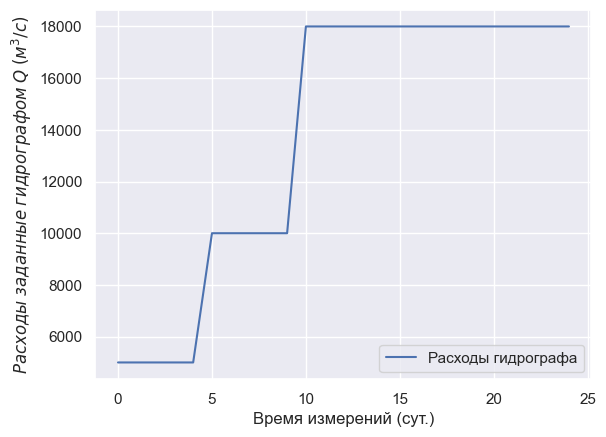

In [37]:
hydrograph_16 = pd.read_csv("Data/raschet/" + 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18' + "/hydrograph_dts.dat")
plt.plot([i for i in range(0, 25)], hydrograph_16.iloc[2:, 0], label='Расходы гидрографа')
plt.xlabel("Время измерений (сут.)")
plt.ylabel(r"$Расходы\;заданные\;гидрографом\;Q\;(м^{3}/c)$")
plt.legend()

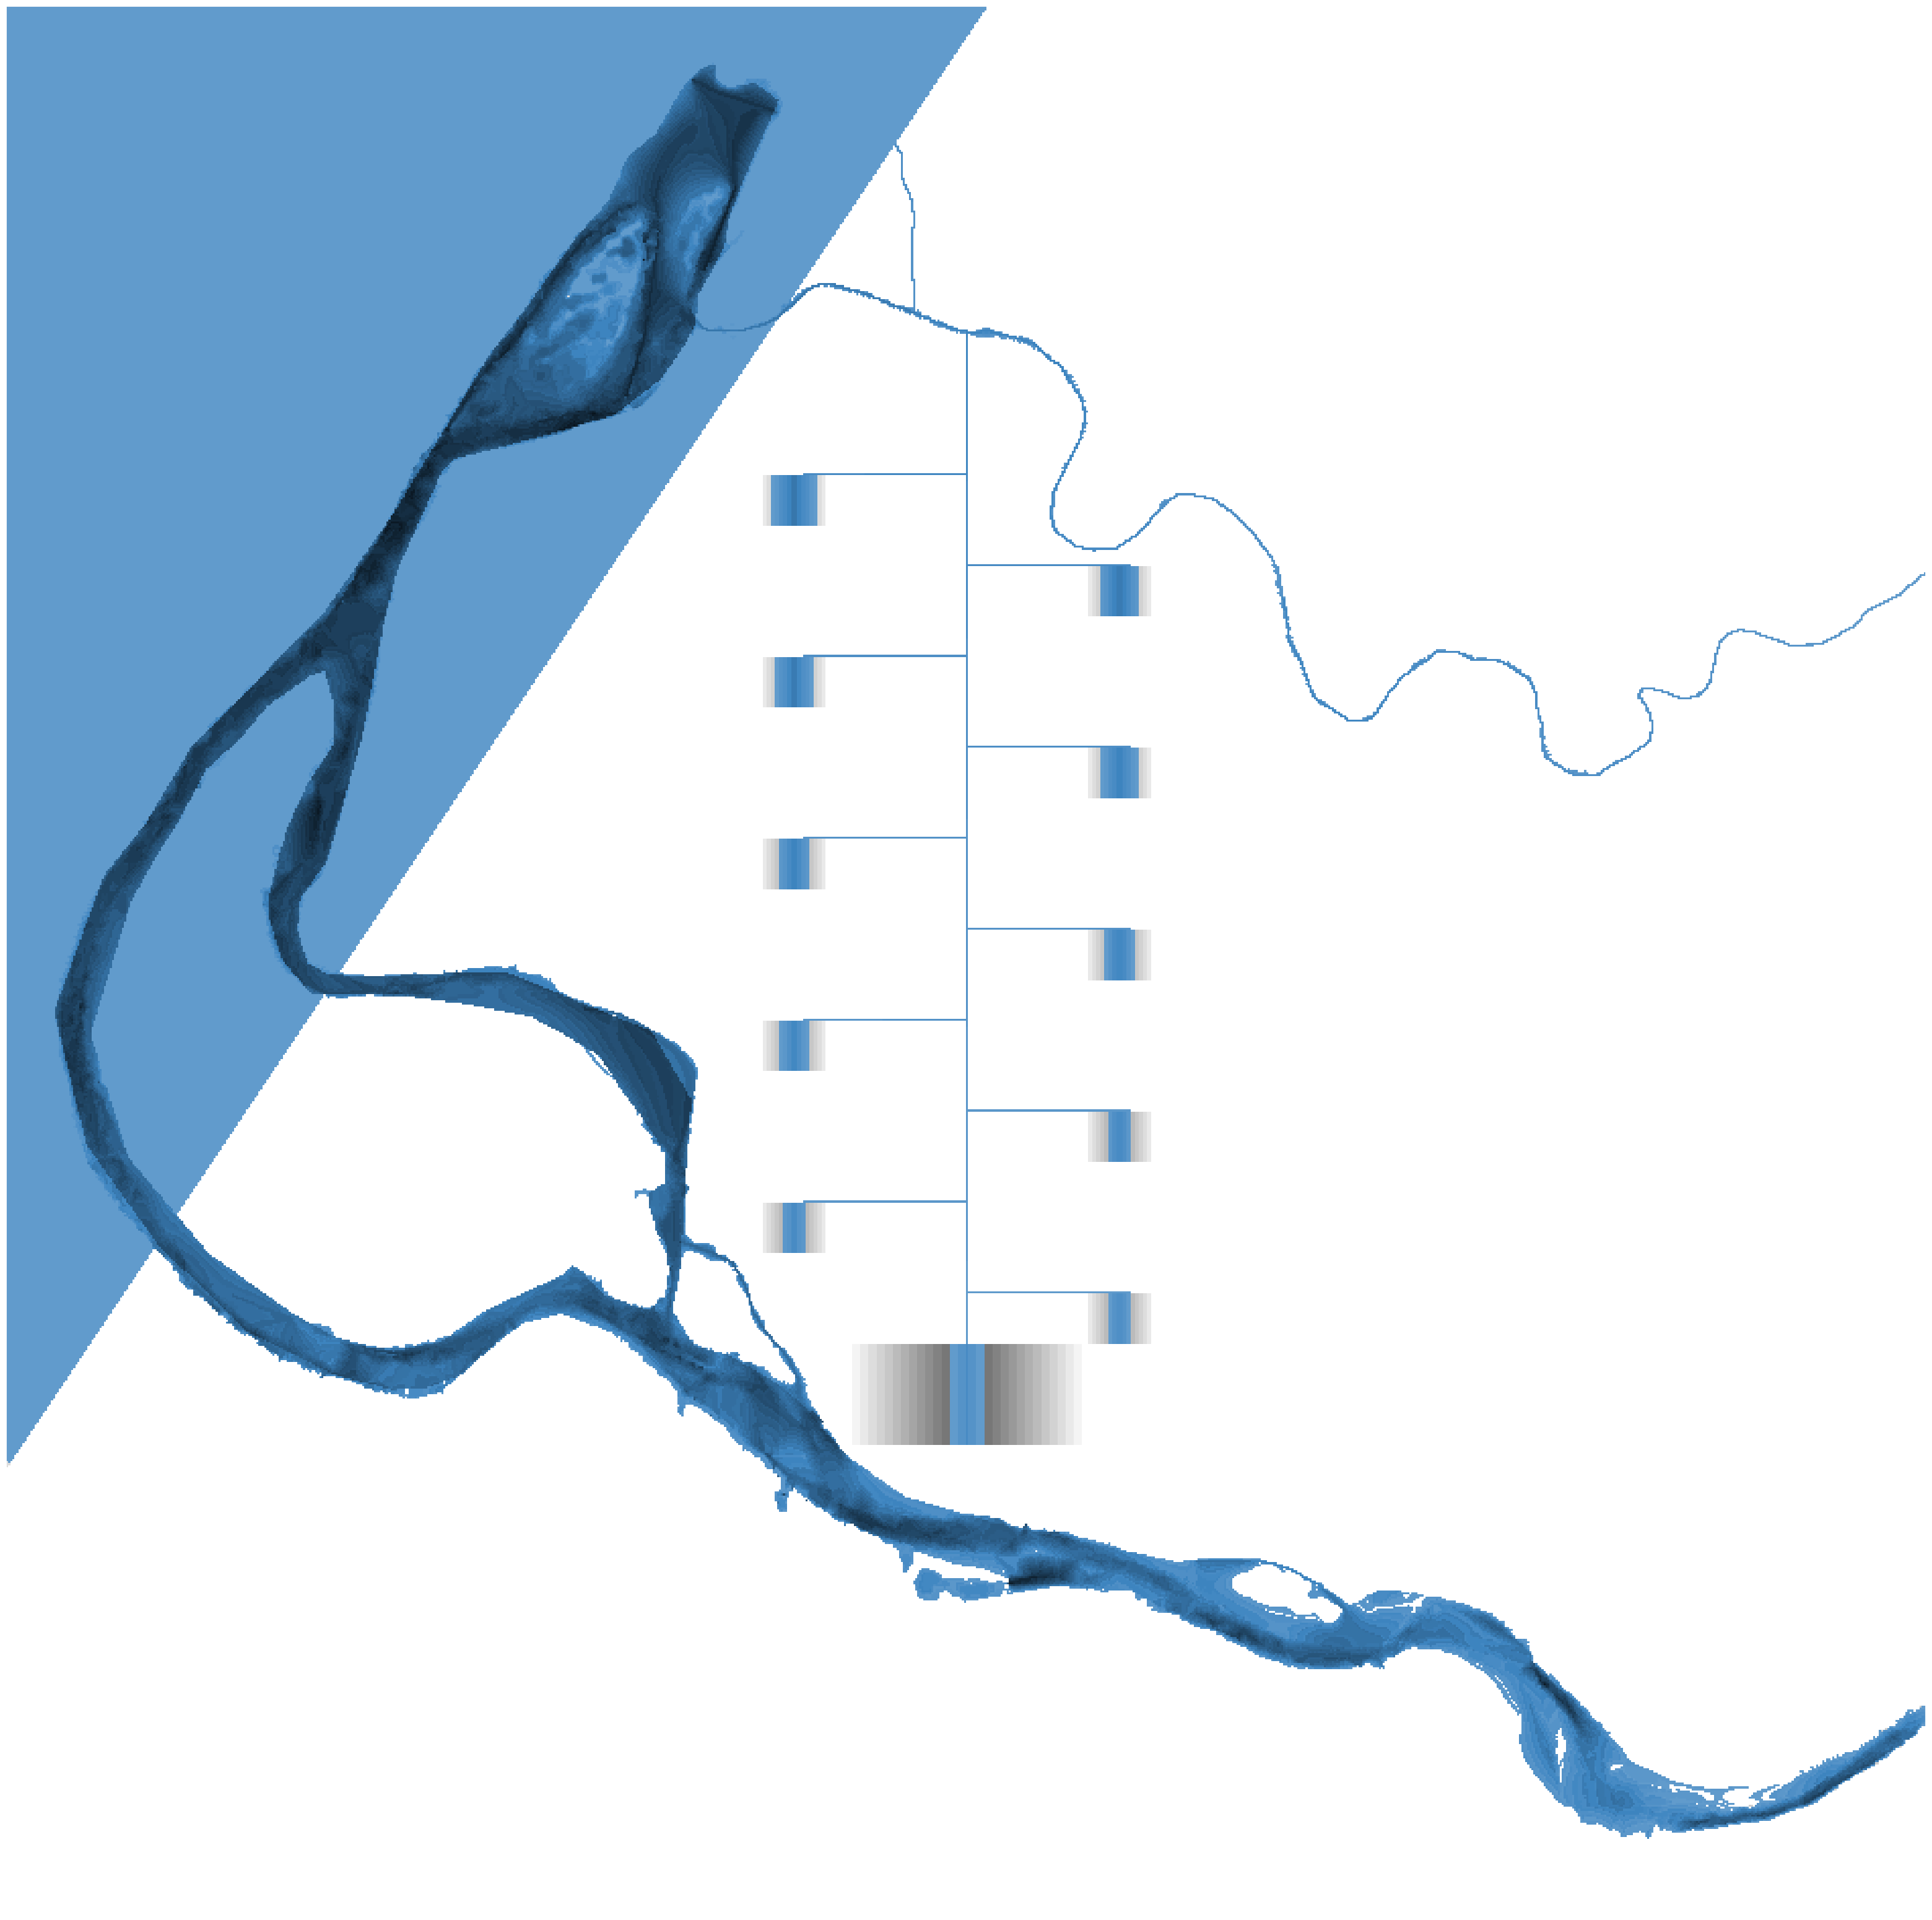

In [22]:
blue = ['#619bcc', '#5b97ca', '#5593c8', '#4f8fc6', '#488bc4', '#4288c2',
'#3d84bf','#397bb3','#3777ac', '#3573a6','#336ea0','#316a9a', '#2f6694','#2d618e','#2b5d87',
'#295981','#27557b','#255075','#234c6f', '#214868','#1f4462','#1d3f5c','#1b3b56','#193750',
'#17334a','#152e43','#132a3d', '#112637', '#0f2231', '#0d1d2b', '#0b1925', '#09151e']
relief1 = ReadFile("Data/raschet/" + 'расчет 2016 relief_model_без_дамб_q_5_18_52дня' + "/relief.grd")
H1 = ReadFile("Data/raschet/" + 'расчет 2016 relief_model_без_дамб_q_5_18_52дня' + "/H_   14.grd")
def plot_relief(rel):
    fig, ax = plt.subplots()
    from matplotlib.colors import ListedColormap

    binary_cmap = plt.cm.get_cmap('binary')
    new_binary_colors = list(binary_cmap(np.linspace(0, 1, binary_cmap.N))[::-1])
    new_binary_cmap = ListedColormap(new_binary_colors, name='new_binary')
    a = ax.pcolormesh(rel, cmap=new_binary_cmap)
    ax.pcolormesh(np.where(H1!=0, H1, np.nan), cmap=mcolors.ListedColormap(blue))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

    ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
    fig.set_figwidth(40)    
    fig.set_figheight(40)
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_relief(relief1)

In [3]:
list1 = [
'расчет 2016 relief_model_без_дамб_q_5_18_52дня',
'расчет 2016 relief_model_дамба_3_q_5_18_52дня',
'расчет 2016 relief_model_дамба_6_q_5_18_52дня',
'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней',
'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней',
'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18'
]

In [10]:
np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])*2

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [17]:
(2500 *H25[0][670:729, 367:405]).sum()

3599256.922956556

In [ ]:
H25[0][670:729, 367:405][H25[0][670:729, 367:405]!=0].size

In [13]:
 H25[0][670:729, 367:405].size

2242

In [4]:
def load_map(j, d, path, list1):
    H = np.zeros((d, 944, 944))
    vx = np.zeros((d, 944, 944))
    vy = np.zeros((d, 944, 944))
    k = 0
    for i in list1:
        H[k]=ReadFile("Data/" + path + i + "/" + 'H_   ' + j[k] + '.grd')
        vx[k]=ReadFile("Data/" + path + i + "/" + 'vx_   ' + j[k] + '.grd')
        vy[k]=ReadFile("Data/" + path + i + "/" + 'vy_   ' + j[k] + '.grd')
        k += 1
    return H, vx, vy

def water_volume(H, k, i):
    a1 = (2500 * H[k][670:729, 367:405]).sum() 
    a2 = (2500 * H[k][631:671, 530:565]).sum()
    a3 = (2500 * H[k][572:670, 367:405]).sum()
    a4 = (2500 * H[k][530:631, 530:565]).sum()
    a5 = (2500 * H[k][494:539, 367:405]).sum()
    a6 = (2500 * H[k][440:530, 530:565]).sum()
    a7 = (2500 * H[k][400:494, 367:405]).sum()
    a8 = (2500 * H[k][355:440, 530:565]).sum()
    a9 = (2500 * H[k][312:400, 367:405]).sum()
    a10 = (2500 * H[k][283:355, 530:565]).sum()
    if i == 0:
        return a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10
    if i == 1:
        return a1
    if i == 2:
        return a2
    if i == 3:
        return a3
    if i == 4:
        return a4
    if i == 5:
        return a5
    if i == 6:
        return a6
    if i == 7:
        return a7
    if i == 8:
        return a8
    if i == 9:
        return a9
    if i == 10:
        return a10

In [6]:
list1

['расчет 2016 relief_model_без_дамб_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_3_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_6_q_5_18_52дня',
 'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18']

In [13]:
H25, vx25, vy25 = load_map(('12', '12', '12', '10', '10', ' 5'), 6, 'raschet/', list1)
H50, vx50, vy50 = load_map(('25', '25', '25', '21', '21', '11'), 6, 'raschet/', list1)
H75, vx75, vy75 = load_map(('38', '38', '38', '32', '32', '17'), 6, 'raschet/', list1)
H100, vx100, vy100 = load_map(('51', '51', '51', '44', '44', '24'), 6, 'raschet/', list1)

In [19]:
list1

['расчет 2016 relief_model_без_дамб_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_3_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_6_q_5_18_52дня',
 'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18']

In [9]:
def volume_plot(H, j, a, b):
    plt.plot([0, 1, 1, 2, 2, 8], [water_volume(H, k, j) for k in range(6)], label=b)
    plt.scatter([0, 1, 1, 2, 2, 8], [water_volume(H, k, j) for k in range(6)])

    plt.title(a)
    plt.xlabel("Количество дамб")
    plt.ylabel(r"$Объем\;воды\;в\;побочном\;русле\;(м^{3})$")
    plt.legend()

In [10]:
def volume_plot2(H, K, mark, a, b, ax):
    ax.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [water_volume(H, k, z) for k, z in zip([K for p in range(1, 11)], range(1, 11))], marker = mark, label=b)
    #plt.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [cost_sum(Rashod, k, z) for k, z in zip([K for p in range(1, 11)], range(1, 11))], marker = mark, label=b)
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], rotation=0)
    ax.set_title(a)
    ax.set_xlabel("Номер побочного русла")
    ax.set_ylabel(r"$Объем\;воды\;в\;побочном\;русле\;(м^{3})$")

In [7]:
list1

['расчет 2016 relief_model_без_дамб_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_3_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_6_q_5_18_52дня',
 'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18']

In [11]:
def Mplot(H, str1):
    fig, ax = plt.subplots()
    fig.set_size_inches(11, 7)
    volume_plot2(H, 0, 'o', str1, 'Без дамб', ax)
    volume_plot2(H, 1, 'v', str1, 'Одна дамба (у русла 3)', ax)
    volume_plot2(H, 2, '.',  str1, 'Одна дамба (у русла 6)', ax)
    volume_plot2(H, 3, 's', str1, 'Две дамбы (у русел 1 и 2)', ax)
    volume_plot2(H, 4, '*', str1, 'Две дамбы (у русел 4 и 5)', ax)
    volume_plot2(H, 5, '+', str1, 'Восемь дамб (у русел 1,2,3,4,6,7,8,9)', ax)
    legend =  ax.legend(borderaxespad=0.5)
    legend.get_frame().set_linewidth(0.5)

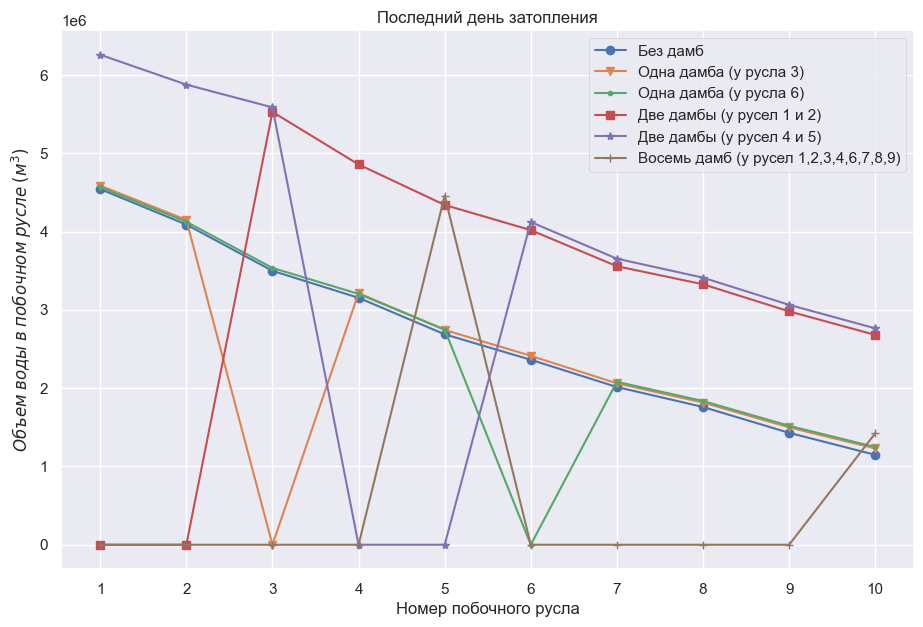

In [21]:
Mplot(H100, 'Последний день затопления')

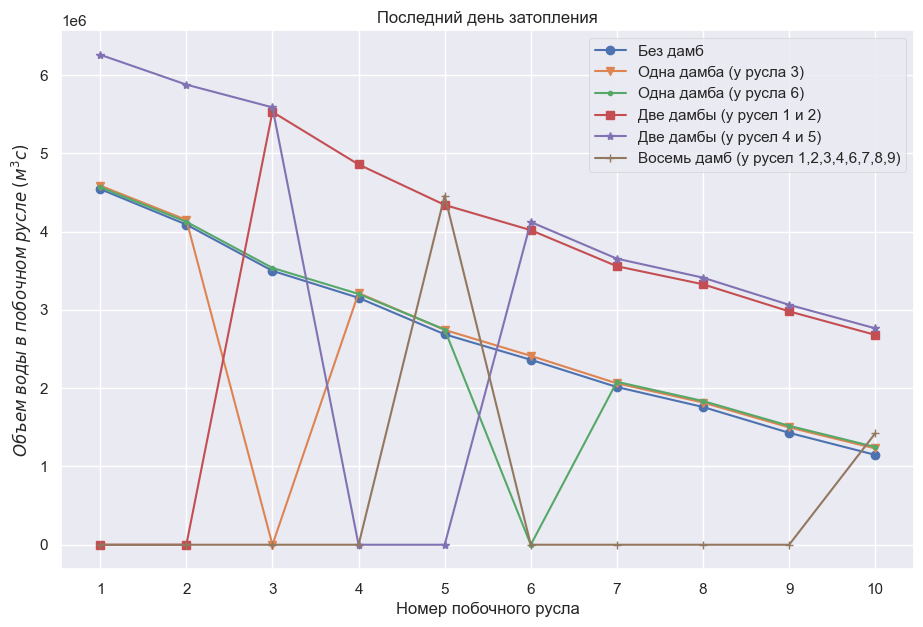

In [23]:
Mplot(H100, 'Последний день затопления')

In [51]:
list1

['расчет 2016 relief_model_без_дамб_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_3_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_6_q_5_18_52дня',
 'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18']

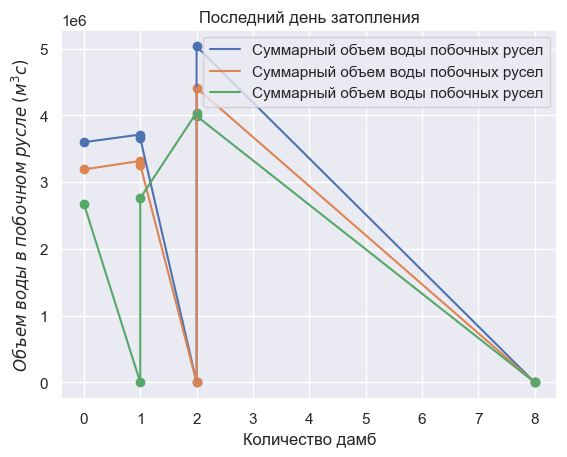

In [52]:
d = 1
volume_plot(H25, d, 'Последний день затопления', 'Суммарный объем воды побочных русел')
volume_plot(H25, 2, 'Последний день затопления', 'Суммарный объем воды побочных русел')
volume_plot(H25, 3, 'Последний день затопления', 'Суммарный объем воды побочных русел')

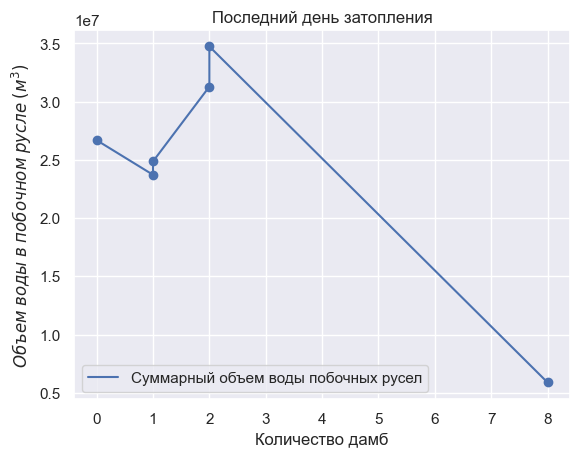

In [17]:
d = 0
volume_plot(H100, d, 'Последний день затопления', 'Суммарный объем воды побочных русел')

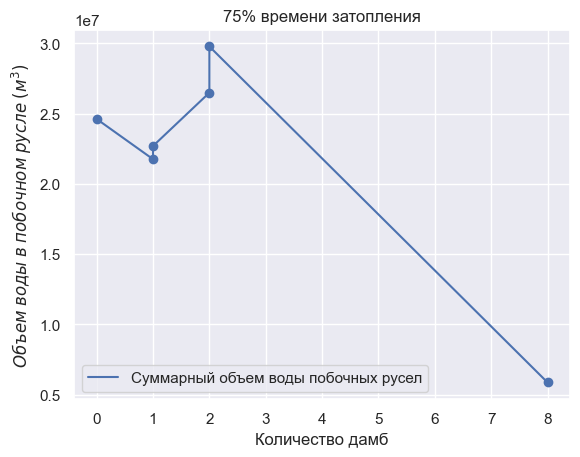

In [16]:
d = 0
volume_plot(H75, d, '75% времени затопления', 'Суммарный объем воды побочных русел')

In [38]:
water_volume(H25, 0, 0)

20057771.438471973

In [45]:
(H25[0][:, :]*2500).sum()

1288017912.7460415

In [ ]:
def volume_plot(H, j, a, b):
    plt.plot([0, 1, 1, 2, 2, 8], [water_volume(H, k, j) for k in range(6)], label=b)
    plt.scatter([0, 1, 1, 2, 2, 8], [water_volume(H, k, j) for k in range(6)])

    plt.title(a)
    plt.xlabel("Количество дамб")
    plt.ylabel(r"$Объем\;воды\;в\;побочном\;русле\;(м^{3}c)$")
    plt.legend()

In [8]:
list1

['расчет 2016 relief_model_без_дамб_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_3_q_5_18_52дня',
 'расчет 2016 relief_model_дамба_6_q_5_18_52дня',
 'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18']

In [ ]:
plt.countpo

<BarContainer object of 5 artists>

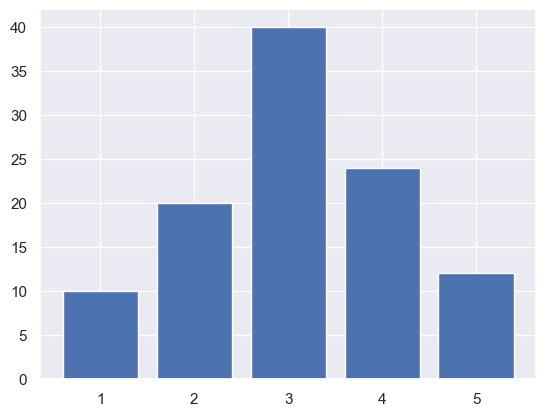

In [10]:
plt.bar([1, 2, 3, 4, 5], [10, 20, 40, 24, 12])